In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Left CINGULATE of subjects in UKB, HCP, CCD and CCD Controls after implementing a betaVAE

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

In [42]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-10-55/CCD/Reconstruction_error.csv")

In [43]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [44]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [45]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [46]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [47]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,ag080048,1.231579,-0.560642,0.868931,-0.382897,0.024093,-0.491222,0.861754,0.578133,-0.020197,...,0.695589,-1.176145,1.091831,-1.871870,-1.510990,-0.986949,1.568752,0.305621,-0.012170,-0.154861
1,bt080019,0.638111,-1.109507,0.197380,0.330434,-0.938535,-0.027576,-0.917380,-0.743809,0.209404,...,-0.214530,-1.427980,0.218215,-0.512826,-0.052739,-1.985139,-0.769358,-0.454226,0.879765,0.272792
2,ca090293,-0.401380,0.393752,-1.520999,-0.109748,-0.834238,-1.904350,-1.397418,-0.080549,-0.534094,...,3.230762,0.013351,0.344507,-0.613264,-0.968896,-0.870082,-0.960548,-0.120391,2.200912,0.178080
3,cd100556,-1.010289,-0.007423,-0.106786,0.029076,0.645668,0.702852,-1.830171,0.986231,-0.322534,...,2.807257,1.448101,-0.110637,-0.115303,-0.859456,-0.074401,1.197723,-1.036047,-0.225085,0.350413
4,cr070055,-0.670152,0.437302,0.303488,0.119872,0.044214,-0.898826,-1.328431,-1.240842,-0.785619,...,1.437920,0.145645,-1.766853,0.416207,-0.123241,-1.469725,-1.161561,1.578339,-0.397603,-1.388615
5,fb070174,-0.981439,-0.679980,-1.564532,1.757403,-0.894397,-0.404870,-2.329747,-0.380295,-0.613353,...,0.645982,0.541847,-0.365480,0.871612,0.014582,-0.412252,-0.169546,-0.249994,0.709806,0.968473
6,gd070065,-2.831090,-0.317966,-1.821017,0.343953,0.155947,0.332496,-2.466474,-0.250376,-1.578787,...,0.492506,-0.283127,-0.328898,-1.055661,-1.596925,-0.991491,-1.256682,0.705712,1.188007,0.003011
7,lc110410,-3.053359,0.875023,-1.059221,0.141890,-0.495022,-0.206732,-1.969295,-1.778237,0.036455,...,-1.199735,-0.465283,0.684000,-1.728153,-1.859310,-1.037003,-0.843827,1.265678,0.950692,1.402519
8,md110095,-0.063205,1.307169,1.591692,-0.859376,1.370182,-0.630189,0.903227,-1.157101,-0.417244,...,-0.954468,-0.675270,0.322671,-0.988482,-1.207594,-1.226384,0.204794,0.319675,1.490478,-0.651687
9,mm080047,0.170803,1.368394,-0.314489,-0.540470,-1.208760,0.267800,-2.396645,-1.050272,0.489964,...,-0.145287,-0.241767,0.632778,1.193997,-0.639620,-0.394152,-0.313532,-0.172176,-0.167791,0.296020


In [48]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,1052.583008
1,bt080019,1810.228027
2,ca090293,2441.614746
3,cd100556,1361.206421
4,cr070055,2236.986572
5,fb070174,1703.986328
6,gd070065,2786.075195
7,lc110410,2786.120361
8,md110095,2150.874023
9,mm080047,1751.645264


In [49]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [50]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [51]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

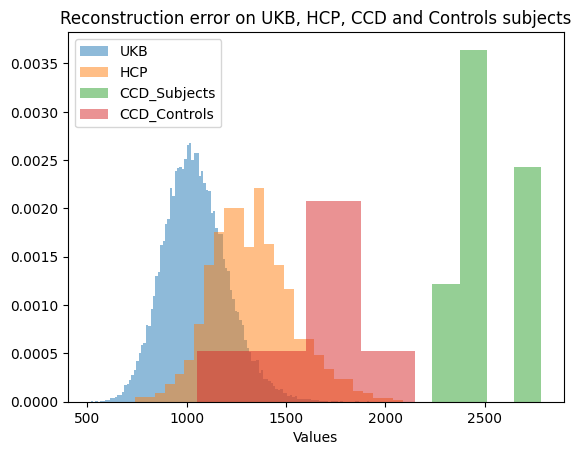

In [52]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [53]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]


In [54]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)



/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


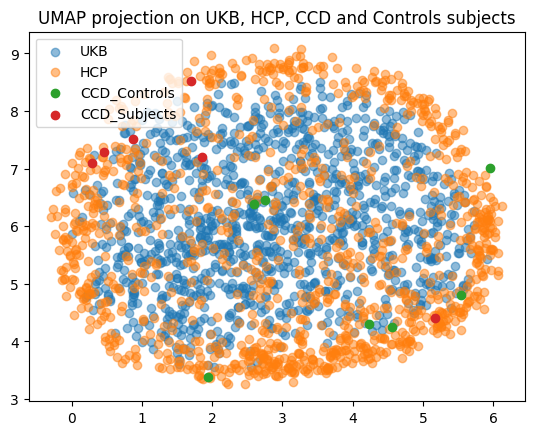

In [55]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of Reconstruction error

In [56]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [57]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,1271.062744
1,UKB,982.845398
2,UKB,1164.539062
3,UKB,1154.072510
4,UKB,1392.422363
...,...,...
42428,UKB,1046.166992
42429,UKB,1291.657471
42430,UKB,764.565491
42431,UKB,873.304932


In [58]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:7.977e-03 U_stat=1.703e+03
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:1.166e-03 U_stat=0.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:7.394e-16 U_stat=0.000e+00


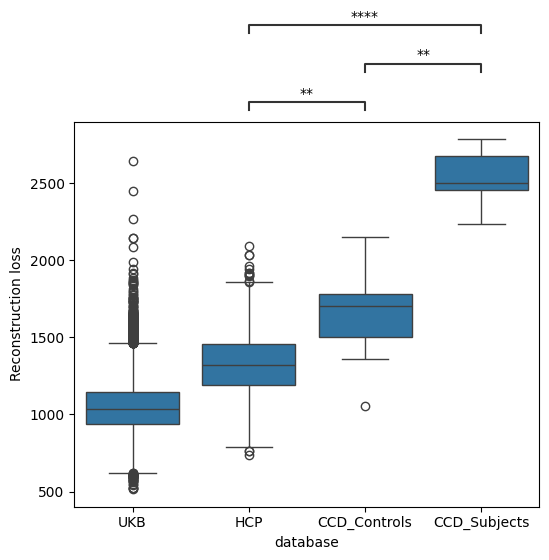

In [59]:
plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()

